<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px">PART OF SPEECH - INTRODUCTION</div>

The challenge of correctly identifying parts of speech is summed up nicely in the [spaCy docs](https://spacy.io/usage/linguistic-features):
<div class="alert alert-info" style="margin: 20px">Processing raw text intelligently is difficult: most words are rare, and it's common for words that look completely different to mean almost the same thing. The same words in a different order can mean something completely different. Even splitting text into useful word-like units can be difficult in many languages. While it's possible to solve some problems starting from only the raw characters, it's usually better to use linguistic knowledge to add useful information. That's exactly what spaCy is designed to do: you put in raw text, and get back a **Doc** object, that comes with a variety of annotations.</div>
In this section we'll take a closer look at coarse POS tags (noun, verb, adjective) and fine-grained tags (plural noun, past-tense verb, superlative adjective).


1.  **Problem**:  Processing raw text intelligently is difficult: most words are rare, and it's common for words that look completely different to mean almost the same thing. The same words in a different order can mean something completely different. It's usually better to use linguistic knoweledge to add useful information.


2. **Part of Speed Tagging**: It refers to the way words are arranged together as a single unit of phrase.

+ Coarse-grained POS tags

+ Fine-grained POS tags


 # <font color=red>1. Syntax - the structure of language

It refers to the way words are arranged together. Words can group together - behave as a single unit or phrase. Constituents:

+ **Noun Phrase - PP**: Determiner (DET) + Nominal
+ **Verb Pharse - VP**: V + NP, V + PP, V + NP + PP
+ **Prepositional Phrase - PP**: P + NP
+ **Sentence - S**: [NP] + [VP] + [PP]

**Context Free Grammar**:

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">SETUP</div>

 ## <font color=red>1. Import library</font>

In [2]:
import joblib
import sys
import sklearn
import pandas as pd
import numpy as np

## for data
import collections
import json

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing text data
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.tokenize.toktok import ToktokTokenizer
import string
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

import string
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.corpus import stopwords

# for calculating similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import  LabelEncoder

wpt = nltk.WordPunctTokenizer()
tokenizer = ToktokTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en_core_web_sm')

## for word embedding
import gensim
import gensim.downloader as gensim_api
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# display various ranges 
pd.options.display.float_format = '{:.3f}'.format

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('spacy: {}'.format(spacy.__version__))
print("Setup complete...")

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
NLTK: 3.6.5
Scikit-learn: 0.23.2
Pandas: 2.0.3
Numpy: 1.21.2
spacy: 3.2.6
Setup complete...


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">DATA</div>

 ## <font color=red>2. News_Category dataset </font>

In [3]:
df = pd.read_csv('News_Category.csv')
print(df.shape)
df = df.reset_index(drop=True)

df.head(5)

(26768, 4)


,category,headline,short_description,text
0,BUSINESS,"U.S. Launches Auto Import Probe, China Vows To...",The investigation could lead to new U.S. tarif...,"U.S. Launches Auto Import Probe, China Vows To..."
1,BUSINESS,Starbucks Says Anyone Can Now Sit In Its Cafes...,The new policy was unveiled weeks after the co...,Starbucks Says Anyone Can Now Sit In Its Cafes...
2,BUSINESS,Seattle Passes Controversial New Tax On City's...,"Following the council vote, Amazon’s vice pres...",Seattle Passes Controversial New Tax On City's...
3,BUSINESS,Uber Ends Forced Arbitration In Individual Cas...,Victims will be free to go to court -- but a f...,Uber Ends Forced Arbitration In Individual Cas...
4,BUSINESS,"Chili's Hit By Data Breach, Credit And Debit C...",The breach is believed to have occurred betwee...,"Chili's Hit By Data Breach, Credit And Debit C..."


In [4]:
for i in range(0,5):
    print(df.text[i])
    print('\n')

U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.


Starbucks Says Anyone Can Now Sit In Its Cafes -- Even Without Buying Anything. The new policy was unveiled weeks after the controversial arrest of two black men at a Philadelphia Starbucks.


Seattle Passes Controversial New Tax On City's Biggest Companies To Combat Housing Crisis. Following the council vote, Amazon’s vice president, Drew Herdener, said the company has resumed construction planning for its so-called Block 18 project in downtown Seattle.


Uber Ends Forced Arbitration In Individual Cases Of Sexual Assault, Harassment. Victims will be free to go to court -- but a few caveats remain.


Chili's Hit By Data Breach, Credit And Debit Card Information Compromised. The breach is believed to have occurred between March and April.




In [5]:
df['category'].value_counts()

category
TRAVEL          9855
FOOD & DRINK    6208
BUSINESS        5878
SPORTS          4827
Name: count, dtype: int64

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">PART OF SPEECH WITH SPACY LIB</div>


The challenge of correctly identifying parts of speech is summed up nicely in the [spaCy docs](https://spacy.io/usage/linguistic-features):
<div class="alert alert-info" style="margin: 20px">Processing raw text intelligently is difficult: most words are rare, and it's common for words that look completely different to mean almost the same thing. The same words in a different order can mean something completely different. Even splitting text into useful word-like units can be difficult in many languages. While it's possible to solve some problems starting from only the raw characters, it's usually better to use linguistic knowledge to add useful information. That's exactly what spaCy is designed to do: you put in raw text, and get back a **Doc** object, that comes with a variety of annotations.</div>
In this section we'll take a closer look at coarse POS tags (noun, verb, adjective) and fine-grained tags (plural noun, past-tense verb, superlative adjective).

# <font color=red>2. Spacy Library </font>
 
spaCy is an open-source Python library that parses and 'understands' large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.) 

After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.<br>Next we created a **Doc** object by applying the model to our text, and named it `doc`.<br>spaCy also builds a companion **Vocab** object that we'll cover in later sections.<br>The **Doc** object that holds the processed text is our focus here.

# <font color=red> 3. Spacy Objects

## <font color=blue>3.1. Break down sentence to list of tokens</font>

In [6]:
# Import spacy and load the language library
import spacy
# !python -m spacy download en
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')
# Print the full text:
print(doc.text)

# Print each token separately
print()
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.dep_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

Tesla is looking at buying U.S. startup for $6 million

Tesla      PROPN    nsubj    NNP    noun, proper singular
is         AUX      aux      VBZ    verb, 3rd person singular present
looking    VERB     ROOT     VBG    verb, gerund or present participle
at         ADP      prep     IN     conjunction, subordinating or preposition
buying     VERB     pcomp    VBG    verb, gerund or present participle
U.S.       PROPN    dobj     NNP    noun, proper singular
startup    VERB     dep      VBD    verb, past tense
for        ADP      prep     IN     conjunction, subordinating or preposition
$          SYM      quantmod $      symbol, currency
6          NUM      compound CD     cardinal number
million    NUM      pobj     CD     cardinal number


In [51]:
sentence = 'singapore is currently the most competitive city in the world, beating out new york and london, according to the economist'
sentence = 'challengers to silicon valley include new york, l.a., boston, tel aviv, and london.'
sentence = 'ed young is the senior pastor of fellowship church, which is headquartered in grapevine, texas but has rapidly expanded across texas, to florida, london (uk) and online.'
sentence = 'she earned her bfa at london college of communication, uk'
sentence = 'london -- a classic mercedes-benz race car driven by formula 1 legend juan manuel fangio sold for 19.6 million pounds ($29.6'
sentence  = 'prices soared as people scrambled to flee the london bridge attack'
sentence= "at a london branch of britain's biggest retailer, tesco , which found horse dna in some of its own-brand frozen spaghetti"
sentence = 'maria perez is the co-founder and product manager of glassful'
sentence = 'london is a tourist’s paradise owing to the several iconic attractions it has to offer.therefore,it makes sense why london'
sentence = "investigators in washington and london last month struck a $450 million settlement with barclays in a rate-rigging case, but"
sentence = 'according to a newly released report, the united states is predicted to win the most medals at the london 2012 olympics.'

# Make your Doc object and pass it into the scorer:
doc = nlp(sentence)

# For practice, visualize your fine-grained POS tags (shown in the third column):
print(f"{'TOKEN':{10}} {'COARSE':{8}} {'FINE':{6}} {'DESCRIPTION FINE':{50}} {'DEPENDENCY':{6}} {'DESCRIPTION DEPENDENCY'}")
print(f"{'-----':{10}} {'------':{8}} {'----':{6}} {'----------------':{50}} {'----------':{6}} {'----------------------'}")

for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_):{50}} {token.dep_:{8}} {spacy.explain(token.dep_)}')

TOKEN      COARSE   FINE   DESCRIPTION FINE                                   DEPENDENCY DESCRIPTION DEPENDENCY
-----      ------   ----   ----------------                                   ---------- ----------------------
according  VERB     VBG    verb, gerund or present participle                 prep     prepositional modifier
to         ADP      IN     conjunction, subordinating or preposition          prep     prepositional modifier
a          DET      DT     determiner                                         det      determiner
newly      ADV      RB     adverb                                             advmod   adverbial modifier
released   VERB     VBN    verb, past participle                              amod     adjectival modifier
report     NOUN     NN     noun, singular or mass                             pobj     object of preposition
,          PUNCT    ,      punctuation mark, comma                            punct    punctuation
the        DET      DT     determiner

### <font color=brown>Explain Components/ tags</font>

Recall that you can obtain a particular token by its index position.
* To view the coarse POS tag use `token.pos_`
* To view the fine-grained tag use `token.tag_`
* To view the description of either type of tag use `spacy.explain(tag)`

<div class="alert alert-success">Note that `token.pos` and `token.tag` return integer hash values; by adding the underscores we get the text equivalent that lives in **doc.vocab**.</div>

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [24]:
# Print the full text
print(doc2.text)

Tesla isn't   looking into startups anymore.


In [25]:
# lemmas (the base form of the word)
print(doc2[4].text)
print(doc2[4].lemma_)

looking
look


In [26]:
# Print the fifth word and Simple Parts-of-Speech & Detailed Tags
print(doc2[4].text, doc2[4].pos_, doc2[4].tag_, spacy.explain(doc2[4].tag_))

looking VERB VBG verb, gerund or present participle


In [91]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [92]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


### <font color=brown>Explain tag</font>

To see the full name of a tag use `spacy.explain(tag)`

In [87]:
spacy.explain('PROPN')

'proper noun'

In [88]:
spacy.explain('nsubj')

'nominal subject'

This doesn't look very user-friendly, but right away we see some interesting things happen:
1. Tesla is recognized to be a Proper Noun, not just a word at the start of a sentence
2. U.S. is kept together as one entity (we call this a 'token')

As we dive deeper into spaCy we'll see what each of these abbreviations mean and how they're derived. We'll also see how spaCy can interpret the last three tokens combined `$6 million` as referring to ***money***.

 # <font color=red>4. Pipeline </font>
 
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.   Image source: https://spacy.io/usage/spacy-101#pipelines

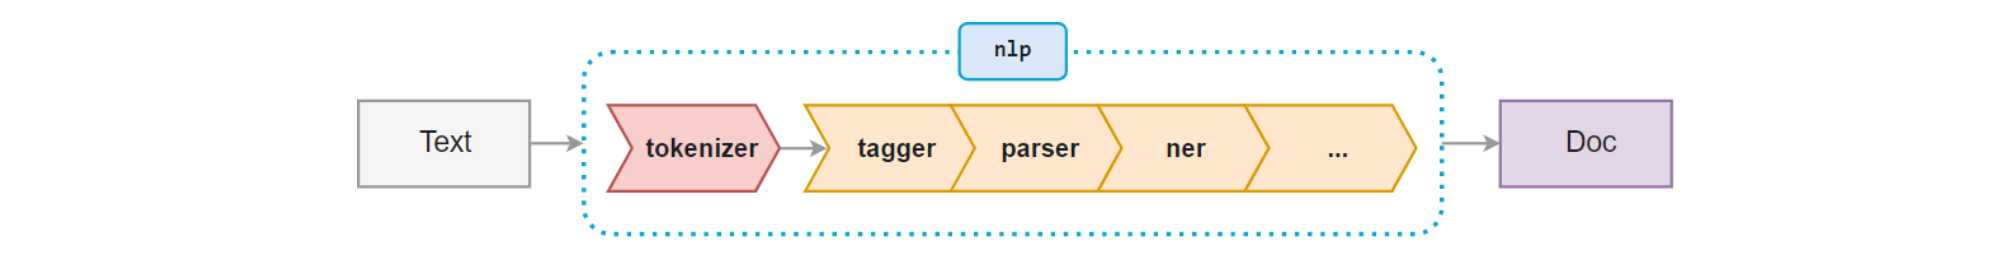

We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

In [81]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x233e19f1be0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x233e7cccbe0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x233e7c9e9e0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x233e72c3140>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x233e7b0e440>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x233e7510d60>)]

In [82]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

 # <font color=red>5. Tokenization </font>
 
Split up all the components parts (words & punctuations) into "tokens"

In [9]:
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

for token in doc2:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.dep_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

Tesla      PROPN    nsubj    NNP    noun, proper singular
is         AUX      aux      VBZ    verb, 3rd person singular present
n't        PART     neg      RB     adverb
           SPACE    dep      _SP    whitespace
looking    VERB     ROOT     VBG    verb, gerund or present participle
into       ADP      prep     IN     conjunction, subordinating or preposition
startups   NOUN     pobj     NNS    noun, plural
anymore    ADV      advmod   RB     adverb
.          PUNCT    punct    .      punctuation mark, sentence closer


Notice how `isn't` has been split into two tokens. spaCy recognizes both the root verb `is` and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens.

It's important to note that even though `doc2` contains processed information about each token, it also retains the original text:

In [11]:
doc2, doc2[0], type(doc2)

(Tesla isn't   looking into startups anymore., Tesla, spacy.tokens.doc.Doc)

In [12]:
for token in doc2:
    print(token.text, end=' | ')

Tesla | is | n't |    | looking | into | startups | anymore | . | 

 ## <font color=blue> 5.1. Part of Speech Tagging (POS) </font>
 
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In the English language, the same string of characters can have different meanings, even within the same sentence. For this reason, morphology is important. **spaCy** uses machine learning algorithms to best predict the use of a token in a sentence. Is *"I read books on NLP"* present or past tense? Is wind a verb or a noun?

In [27]:
doc = nlp(u'I read books on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBP    verb, non-3rd person singular present


In [28]:
doc = nlp(u'I read a book on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBP    verb, non-3rd person singular present


In the first example, with no other cues to work from, spaCy assumed that ***read*** was present tense.<br>In the second example the present tense form would be ***I am reading a book***, so spaCy assigned the past tense.

### <font color=brown>Counting POS Tags</font>

The `Doc.count_by()` method accepts a specific token attribute as its argument, and returns a frequency count of the given attribute as a dictionary object. Keys in the dictionary are the integer values of the given attribute ID, and values are the frequency. Counts of zero are not included.

In [34]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")
# Count the frequencies of different coarse-grained POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
POS_counts

{90: 2, 84: 3, 92: 3, 100: 1, 85: 1, 94: 1, 97: 1}

This isn't very helpful until you decode the attribute ID:

In [19]:
doc.vocab[84].text

'ADJ'

In [36]:
doc.vocab[90].text

'DET'

In [35]:
spacy.attrs.POS

74

### <font color=brown> Create a frequency list of POS tags from the entire document </font>

Since `POS_counts` returns a dictionary, we can obtain a list of keys with `POS_counts.items()`.<br>By sorting the list we have access to the tag and its count, in order.

In [37]:
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

84. ADJ  : 3
85. ADP  : 1
90. DET  : 2
92. NOUN : 3
94. PART : 1
97. PUNCT: 1
100. VERB : 1


In [38]:
# Count the different fine-grained tags:
TAG_counts = doc.count_by(spacy.attrs.TAG)

for k,v in sorted(TAG_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

74. POS : 1
1292078113972184607. IN  : 1
10554686591937588953. JJ  : 3
12646065887601541794. .   : 1
15267657372422890137. DT  : 2
15308085513773655218. NN  : 3
17109001835818727656. VBD : 1


<div class="alert alert-success">**Why did the ID numbers get so big?** In spaCy, certain text values are hardcoded into `Doc.vocab` and take up the first several hundred ID numbers. Strings like 'NOUN' and 'VERB' are used frequently by internal operations. Others, like fine-grained tags, are assigned hash values as needed.</div>
<div class="alert alert-success">**Why don't SPACE tags appear?** In spaCy, only strings of spaces (two or more) are assigned tokens. Single spaces are not.</div>

In [39]:
# Count the different dependencies:
DEP_counts = doc.count_by(spacy.attrs.DEP)

for k,v in sorted(DEP_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

402. amod: 3
415. det : 2
429. nsubj: 1
439. pobj: 1
440. poss: 1
443. prep: 1
445. punct: 1
8110129090154140942. case: 1
8206900633647566924. ROOT: 1


Here we've shown `spacy.attrs.POS`, `spacy.attrs.TAG` and `spacy.attrs.DEP`.<br>Refer back to the **Vocabulary and Matching** lecture from the previous section for a table of **Other token attributes**.

### <font color=brown> Coarse-grained Part-of-speech Tags </font>
Every token is assigned a POS Tag from the following list:


<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

### <font color=brown> Fine-grained Part-of-speech Tags </font>

Tokens are subsequently given a fine-grained tag as determined by morphology:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

For a current list of tags for all languages visit https://spacy.io/api/annotation#pos-tagging

### <font color=brown> Fine-grained POS Tag Examples </font>

These are some grammatical examples (shown in **bold**) of specific fine-grained tags. We've removed punctuation and rarely used tags:
<table>
<tr><th>POS</th><th>TAG</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>ADJ</td><td>AFX</td><td>affix</td><td>The Flintstones were a **pre**-historic family.</td></tr>
<tr><td>ADJ</td><td>JJ</td><td>adjective</td><td>This is a **good** sentence.</td></tr>
<tr><td>ADJ</td><td>JJR</td><td>adjective, comparative</td><td>This is a **better** sentence.</td></tr>
<tr><td>ADJ</td><td>JJS</td><td>adjective, superlative</td><td>This is the **best** sentence.</td></tr>
<tr><td>ADJ</td><td>PDT</td><td>predeterminer</td><td>Waking up is **half** the battle.</td></tr>
<tr><td>ADJ</td><td>PRP\$</td><td>pronoun, possessive</td><td>**His** arm hurts.</td></tr>
<tr><td>ADJ</td><td>WDT</td><td>wh-determiner</td><td>It's blue, **which** is odd.</td></tr>
<tr><td>ADJ</td><td>WP\$</td><td>wh-pronoun, possessive</td><td>We don't know **whose** it is.</td></tr>
<tr><td>ADP</td><td>IN</td><td>conjunction, subordinating or preposition</td><td>It arrived **in** a box.</td></tr>
<tr><td>ADV</td><td>EX</td><td>existential there</td><td>**There** is cake.</td></tr>
<tr><td>ADV</td><td>RB</td><td>adverb</td><td>He ran **quickly**.</td></tr>
<tr><td>ADV</td><td>RBR</td><td>adverb, comparative</td><td>He ran **quicker**.</td></tr>
<tr><td>ADV</td><td>RBS</td><td>adverb, superlative</td><td>He ran **fastest**.</td></tr>
<tr><td>ADV</td><td>WRB</td><td>wh-adverb</td><td>**When** was that?</td></tr>
<tr><td>CONJ</td><td>CC</td><td>conjunction, coordinating</td><td>The balloon popped **and** everyone jumped.</td></tr>
<tr><td>DET</td><td>DT</td><td>determiner</td><td>**This** is **a** sentence.</td></tr>
<tr><td>INTJ</td><td>UH</td><td>interjection</td><td>**Um**, I don't know.</td></tr>
<tr><td>NOUN</td><td>NN</td><td>noun, singular or mass</td><td>This is a **sentence**.</td></tr>
<tr><td>NOUN</td><td>NNS</td><td>noun, plural</td><td>These are **words**.</td></tr>
<tr><td>NOUN</td><td>WP</td><td>wh-pronoun, personal</td><td>**Who** was that?</td></tr>
<tr><td>NUM</td><td>CD</td><td>cardinal number</td><td>I want **three** things.</td></tr>
<tr><td>PART</td><td>POS</td><td>possessive ending</td><td>Fred**'s** name is short.</td></tr>
<tr><td>PART</td><td>RP</td><td>adverb, particle</td><td>Put it **back**!</td></tr>
<tr><td>PART</td><td>TO</td><td>infinitival to</td><td>I want **to** go.</td></tr>
<tr><td>PRON</td><td>PRP</td><td>pronoun, personal</td><td>**I** want **you** to go.</td></tr>
<tr><td>PROPN</td><td>NNP</td><td>noun, proper singular</td><td>**Kilroy** was here.</td></tr>
<tr><td>PROPN</td><td>NNPS</td><td>noun, proper plural</td><td>The **Flintstones** were a pre-historic family.</td></tr>
<tr><td>VERB</td><td>MD</td><td>verb, modal auxiliary</td><td>This **could** work.</td></tr>
<tr><td>VERB</td><td>VB</td><td>verb, base form</td><td>I want to **go**.</td></tr>
<tr><td>VERB</td><td>VBD</td><td>verb, past tense</td><td>This **was** a sentence.</td></tr>
<tr><td>VERB</td><td>VBG</td><td>verb, gerund or present participle</td><td>I am **going**.</td></tr>
<tr><td>VERB</td><td>VBN</td><td>verb, past participle</td><td>The treasure was **lost**.</td></tr>
<tr><td>VERB</td><td>VBP</td><td>verb, non-3rd person singular present</td><td>I **want** to go.</td></tr>
<tr><td>VERB</td><td>VBZ</td><td>verb, 3rd person singular present</td><td>He **wants** to go.</td></tr>
</table>

# 2. Visualizing POS

spaCy offers an outstanding visualizer called **displaCy**:

In [40]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

# Import the displaCy library
from spacy import displacy

In [41]:
# Create a simple Doc object
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

In [42]:
# Render the dependency parse immediately inside Jupyter:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

The dependency parse shows the coarse POS tag for each token, as well as the **dependency tag** if given:

In [43]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{7}} {token.dep_:{7}} {spacy.explain(token.dep_)}')

The        DET     det     determiner
quick      ADJ     amod    adjectival modifier
brown      ADJ     amod    adjectival modifier
fox        NOUN    nsubj   nominal subject
jumped     VERB    ROOT    None
over       ADP     prep    prepositional modifier
the        DET     det     determiner
lazy       ADJ     amod    adjectival modifier
dog        NOUN    poss    possession modifier
's         PART    case    case marking
back       NOUN    pobj    object of preposition
.          PUNCT   punct   punctuation


### Creating Visualizations Outside of Jupyter

If you're using another Python IDE or writing a script, you can choose to have spaCy serve up HTML separately.

Instead of `displacy.render()`, use `displacy.serve()`:

In [44]:
displacy.serve(doc, style='dep', options={'distance': 110})


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [30/Mar/2025 06:43:35] "GET / HTTP/1.1" 200 9188
127.0.0.1 - - [30/Mar/2025 06:43:35] "GET /favicon.ico HTTP/1.1" 200 9188


Shutting down server on port 5000.


<font color=blue>**After running the cell above, click the link below to view the dependency parse**:</font>

http://127.0.0.1:5000
<br><br>
<font color=red>**To shut down the server and return to jupyter**, interrupt the kernel either through the **Kernel** menu above, by hitting the black square on the toolbar, or by typing the keyboard shortcut `Esc`, `I`, `I`</font>

<font color=green>**NOTE**: We'll use this method moving forward because, at this time, several of the customizations we want to show don't work well in Jupyter.</font>

 ## <font color=blue> 5.2. Dependencies (DEP) </font>

We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of typed dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [86]:
doc2[0].dep_

'nsubj'

# <font color=red> 6. Spans - Handling large text
    
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.    

In [93]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [94]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [95]:
type(life_quote)

spacy.tokens.span.Span

In upcoming lectures we'll see how to create Span objects using `Span()`. This will allow us to assign additional information to the Span.

# <font color=red> 7. Sentences
    
Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.    

In [96]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [97]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [98]:
doc4[6].is_sent_start

True

### `Doc.sents` is a generator
It is important to note that `doc.sents` is a *generator*. That is, a Doc is not segmented until `doc.sents` is called. This means that, where you could print the second Doc token with `print(doc[1])`, you can't call the "second Doc sentence" with `print(doc.sents[1])`:

In [3]:
print(doc[1])

is


In [4]:
print(doc.sents[1])

TypeError: 'generator' object is not subscriptable

However, you *can* build a sentence collection by running `doc.sents` and saving the result to a list:

In [5]:
doc_sents = [sent for sent in doc.sents]
doc_sents

[This is the first sentence.,
 This is another sentence.,
 This is the last sentence.]

<font color=green>**NOTE**: `list(doc.sents)` also works. We show a list comprehension as it allows you to pass in conditionals.</font>

In [6]:
# Now you can access individual sentences:
print(doc_sents[1])

This is another sentence.


### `sents` are Spans
At first glance it looks like each `sent` contains text from the original Doc object. In fact they're just Spans with start and end token pointers.

In [7]:
type(doc_sents[1])

spacy.tokens.span.Span

In [8]:
print(doc_sents[1].start, doc_sents[1].end)

6 11


## Adding Rules
spaCy's built-in `sentencizer` relies on the dependency parse and end-of-sentence punctuation to determine segmentation rules. We can add rules of our own, but they have to be added *before* the creation of the Doc object, as that is where the parsing of segment start tokens happens:

In [9]:
# Parsing the segmentation start tokens happens during the nlp pipeline
doc2 = nlp(u'This is a sentence. This is a sentence. This is a sentence.')

for token in doc2:
    print(token.is_sent_start, ' '+token.text)

None  This
None  is
None  a
None  sentence
None  .
True  This
None  is
None  a
None  sentence
None  .
True  This
None  is
None  a
None  sentence
None  .


<font color=green>Notice we haven't run `doc2.sents`, and yet `token.is_sent_start` was set to True on two tokens in the Doc.</font>

Let's add a semicolon to our existing segmentation rules. That is, whenever the sentencizer encounters a semicolon, the next token should start a new segment.

In [2]:
# SPACY'S DEFAULT BEHAVIOR
doc3 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


In [2]:
# ADD A NEW RULE TO THE PIPELINE
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc

nlp.add_pipe(set_custom_boundaries, before='parser')

nlp.pipe_names

['tagger', 'set_custom_boundaries', 'parser', 'ner']

<font color=green>The new rule has to run before the document is parsed. Here we can either pass the argument `before='parser'` or `first=True`.

In [3]:
# Re-run the Doc object creation:
doc4 = nlp(u'"Management is doing things right; leadership is doing the right things." -Peter Drucker')

for sent in doc4.sents:
    print(sent)

"Management is doing things right;
leadership is doing the right things."
-Peter Drucker


In [13]:
# And yet the new rule doesn't apply to the older Doc object:
for sent in doc3.sents:
    print(sent)

"Management is doing things right; leadership is doing the right things."
-Peter Drucker


### Why not change the token directly?
Why not simply set the `.is_sent_start` value to True on existing tokens?

In [4]:
# Find the token we want to change:
doc3[7]

leadership

In [5]:
# Try to change the .is_sent_start attribute:
doc3[7].is_sent_start = True

ValueError: [E043] Refusing to write to token.sent_start if its document is parsed, because this may cause inconsistent state.

<font color=green>spaCy refuses to change the tag after the document is parsed to prevent inconsistencies in the data.</font>

## Changing the Rules
In some cases we want to *replace* spaCy's default sentencizer with our own set of rules. In this section we'll see how the default sentencizer breaks on periods. We'll then replace this behavior with a sentencizer that breaks on linebreaks.

In [24]:
nlp = spacy.load('en_core_web_sm')  # reset to the original

mystring = u"This is a sentence. This is another.\n\nThis is a \nthird sentence."

# SPACY DEFAULT BEHAVIOR:
doc = nlp(mystring)

for sent in doc.sents:
    print([token.text for token in sent])

['This', 'is', 'a', 'sentence', '.']
['This', 'is', 'another', '.', '\n\n']
['This', 'is', 'a', '\n', 'third', 'sentence', '.']


In [25]:
# CHANGING THE RULES
from spacy.pipeline import SentenceSegmenter

def split_on_newlines(doc):
    start = 0
    seen_newline = False
    for word in doc:
        if seen_newline:
            yield doc[start:word.i]
            start = word.i
            seen_newline = False
        elif word.text.startswith('\n'): # handles multiple occurrences
            seen_newline = True
    yield doc[start:]      # handles the last group of tokens


sbd = SentenceSegmenter(nlp.vocab, strategy=split_on_newlines)
nlp.add_pipe(sbd)

<font color=green>While the function `split_on_newlines` can be named anything we want, it's important to use the name `sbd` for the SentenceSegmenter.</font>

In [26]:
doc = nlp(mystring)
for sent in doc.sents:
    print([token.text for token in sent])

['This', 'is', 'a', 'sentence', '.', 'This', 'is', 'another', '.', '\n\n']
['This', 'is', 'a', '\n']
['third', 'sentence', '.']


<font color=green>Here we see that periods no longer affect segmentation, only linebreaks do. This would be appropriate when working with a long list of tweets, for instance.</font>
## Next Up: POS Assessment

# <font color=red> 8. Name Entity Recognition (NER)

spaCy has an **'ner'** pipeline component that identifies token spans fitting a predetermined set of named entities. These are available as the `ents` property of a `Doc` object.

In [45]:
# Write a function to display basic entity info:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [46]:
doc = nlp(u'May I go to Washington, DC next May to see the Washington Monument?')

show_ents(doc)

Washington - GPE - Countries, cities, states
DC - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Washington Monument - ORG - Companies, agencies, institutions, etc.


Here we see tokens combine to form the entities `Washington, DC`, `next May` and `the Washington Monument`

 ## <font color=blue>8.1. Entity annotations </font>
`Doc.ents` are token spans with their own set of annotations.
<table>
<tr><td>`ent.text`</td><td>The original entity text</td></tr>
<tr><td>`ent.label`</td><td>The entity type's hash value</td></tr>
<tr><td>`ent.label_`</td><td>The entity type's string description</td></tr>
<tr><td>`ent.start`</td><td>The token span's *start* index position in the Doc</td></tr>
<tr><td>`ent.end`</td><td>The token span's *stop* index position in the Doc</td></tr>
<tr><td>`ent.start_char`</td><td>The entity text's *start* index position in the Doc</td></tr>
<tr><td>`ent.end_char`</td><td>The entity text's *stop* index position in the Doc</td></tr>
</table>



In [47]:
doc = nlp(u'Can I please borrow 500 dollars from you to buy some Microsoft stock?')

for ent in doc.ents:
    print(ent.text, ent.start, ent.end, ent.start_char, ent.end_char, ent.label_)

500 dollars 4 6 20 31 MONEY
Microsoft 11 12 53 62 ORG


## <font color=blue>8.2. NER Tags </font>
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

 ## <font color=blue> 8.3. Adding a Named Entity to a Span
Normally we would have spaCy build a library of named entities by training it on several samples of text.<br>In this case, we only want to add one value:

In [48]:
doc = nlp(u'Tesla to build a U.K. factory for $6 million')

show_ents(doc)

U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


<font color=green>Right now, spaCy does not recognize "Tesla" as a company.</font>

In [49]:
from spacy.tokens import Span

# Get the hash value of the ORG entity label
ORG = doc.vocab.strings[u'ORG']  

# Create a Span for the new entity
new_ent = Span(doc, 0, 1, label=ORG)

# Add the entity to the existing Doc object
doc.ents = list(doc.ents) + [new_ent]

<font color=green>In the code above, the arguments passed to `Span()` are:</font>
-  `doc` - the name of the Doc object
-  `0` - the *start* index position of the span
-  `1` - the *stop* index position (exclusive)
-  `label=ORG` - the label assigned to our entity

In [50]:
show_ents(doc)

Tesla - ORG - Companies, agencies, institutions, etc.
U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


## <font color=blue> 8.4. Adding Named Entities to All Matching Spans </color>
What if we want to tag *all* occurrences of "Tesla"? In this section we show how to use the PhraseMatcher to identify a series of spans in the Doc:

In [8]:
doc = nlp(u'Our company plans to introduce a new vacuum cleaner. '
          u'If successful, the vacuum cleaner will be our first product.')

show_ents(doc)

first - ORDINAL - "first", "second", etc.


In [9]:
# Import PhraseMatcher and create a matcher object:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [10]:
# Create the desired phrase patterns:
phrase_list = ['vacuum cleaner', 'vacuum-cleaner']
phrase_patterns = [nlp(text) for text in phrase_list]

In [11]:
# Apply the patterns to our matcher object:
matcher.add('newproduct', None, *phrase_patterns)

# Apply the matcher to our Doc object:
matches = matcher(doc)

# See what matches occur:
matches

[(2689272359382549672, 7, 9), (2689272359382549672, 14, 16)]

In [12]:
# Here we create Spans from each match, and create named entities from them:
from spacy.tokens import Span

PROD = doc.vocab.strings[u'PRODUCT']

new_ents = [Span(doc, match[1],match[2],label=PROD) for match in matches]

doc.ents = list(doc.ents) + new_ents

In [13]:
show_ents(doc)

vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
first - ORDINAL - "first", "second", etc.


## <font color=blue> 8.5. Counting Entities </font>
While spaCy may not have a built-in tool for counting entities, we can pass a conditional statement into a list comprehension:

In [14]:
doc = nlp(u'Originally priced at $29.50, the sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit
five dollars - MONEY - Monetary values, including unit


In [15]:
len([ent for ent in doc.ents if ent.label_=='MONEY'])

2

## <font color=blue>8.6. Problem with Line Breaks</font>

<div class="alert alert-info" style="margin: 20px">There's a <a href='https://github.com/explosion/spaCy/issues/1717'>known issue</a> with <strong>spaCy v2.0.12</strong> where some linebreaks are interpreted as `GPE` entities:</div>

In [16]:
spacy.__version__

'2.0.12'

In [17]:
doc = nlp(u'Originally priced at $29.50,\nthe sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit

 - GPE - Countries, cities, states
five dollars - MONEY - Monetary values, including unit


#### However, there is a simple fix that can be added to the nlp pipeline:

In [18]:
# Quick function to remove ents formed on whitespace:
def remove_whitespace_entities(doc):
    doc.ents = [e for e in doc.ents if not e.text.isspace()]
    return doc

# Insert this into the pipeline AFTER the ner component:
nlp.add_pipe(remove_whitespace_entities, after='ner')

In [19]:
# Rerun nlp on the text above, and show ents:
doc = nlp(u'Originally priced at $29.50,\nthe sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit
five dollars - MONEY - Monetary values, including unit


For more on **Named Entity Recognition** visit https://spacy.io/usage/linguistic-features#101

## <font color=blue> 8.7. Noun Chunks
`Doc.noun_chunks` are *base noun phrases*: token spans that include the noun and words describing the noun. Noun chunks cannot be nested, cannot overlap, and do not involve prepositional phrases or relative clauses.<br>
Where `Doc.ents` rely on the **ner** pipeline component, `Doc.noun_chunks` are provided by the **parser**.

### `noun_chunks` components:
<table>
<tr><td>`.text`</td><td>The original noun chunk text.</td></tr>
<tr><td>`.root.text`</td><td>The original text of the word connecting the noun chunk to the rest of the parse.</td></tr>
<tr><td>`.root.dep_`</td><td>Dependency relation connecting the root to its head.</td></tr>
<tr><td>`.root.head.text`</td><td>The text of the root token's head.</td></tr>
</table>

In [20]:
doc = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc.noun_chunks:
    print(chunk.text+' - '+chunk.root.text+' - '+chunk.root.dep_+' - '+chunk.root.head.text)

Autonomous cars - cars - nsubj - shift
insurance liability - liability - dobj - shift
manufacturers - manufacturers - pobj - toward


### `Doc.noun_chunks` is a  generator function
Previously we mentioned that `Doc` objects do not retain a list of sentences, but they're available through the `Doc.sents` generator.<br>It's the same with `Doc.noun_chunks` - lists can be created if needed:

In [21]:
len(doc.noun_chunks)

TypeError: object of type 'generator' has no len()

In [22]:
len(list(doc.noun_chunks))

3

For more on **noun_chunks** visit https://spacy.io/usage/linguistic-features#noun-chunks

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em;  font-size: 25px">PART OF SPEECH WITH NLTK</div>

#<font color='#00d8d6'> Part of Speech Tagging<br>
<font color='#05c46b' >NLTK Taggers<br>This package contains classes for part-of-speech tagging, or simply “tagging”.<br>A “tag” specifies some property of a token, such as its part of speech. <br>An Off-the-self tagger is available for English <br>
<font color='#00d8d6'>Functions: <br>punkt is used for tokenising sentences <br> averaged_perceptron_tagger is used for tagging words with their parts of speech (POS).

In [15]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
sentence = "The small boy ate the pancakes from the restaurant"

<font color='#00d8d6'>tokenize

In [17]:
token = nltk.word_tokenize(sentence)
print(token)

['The', 'small', 'boy', 'ate', 'the', 'pancakes', 'from', 'the', 'restaurant']


<font color='#00d8d6'> POS Tagging

In [18]:
tags = nltk.pos_tag(token)
print(tags)

[('The', 'DT'), ('small', 'JJ'), ('boy', 'NN'), ('ate', 'VBP'), ('the', 'DT'), ('pancakes', 'NNS'), ('from', 'IN'), ('the', 'DT'), ('restaurant', 'NN')]


# Useful Applications of Parser

https://www.udemy.com/course/nidia-natural-language-processing-deep-learning-zero-to-hero/learn/lecture/26178570#overview

A natural language parser is a program that figures out which groups of words go together (as "phrases") and which words are the subject or object or a verb. The Stanford Parser, developed by the Stanford NLP Group - was one of the biggest breakthroughs in natural language processing in the 1990s

Part-of-speech (POS) and syntactic parsing are used to extract noun phrases. Pattern-based approaches extract phrases to classify opinion based on the word "excellent' and 'poor'

##<font color='#fd79a8'>Part of Speech tagging & Parser<br>NER using NLTK

In [19]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

[NLTK Perceptron Tagger Source](https://www.nltk.org/_modules/nltk/tag/perceptron.html)

<font color='#fd79a8'>Tagger	Accuracy<br>
PerceptronTagger	98.8%<br>
NLTKTagger	94.0%<br>
PatternTagger	91.6%

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk import pos_tag, word_tokenize, RegexpParser

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<font color="pink">NLTK data package includes a pre-trained Punkt tokenizer<br>[IBM Watson Resource for Part-of-speech tags](https://www.ibm.com/docs/en/wca/3.5.0?topic=analytics-part-speech-tag-sets)<br>[NLTK Chunking notes](http://www.nltk.org/howto/chunk.html#:~:text=Chunking%20uses%20a%20special%20regexp,a%20sentence%20can%20be%20chunked.)

The perceptron part-of-speech tagger implements part-of-speech tagging using the averaged, structured perceptron algorithm.<br>Structured prediction - For POS tagging - the simplest
approach is break the problem down to per-token tagging and then
tag left to right

In [21]:
import os
import matplotlib as mpl
# if os.environ.get('DISPLAY','') == '':
#     print('no display found. Using non-interactive Agg backend')
#     mpl.use('Agg')
# import matplotlib.pyplot as plt

![picture](https://www.studentuk.com/wp-content/uploads/2016/08/short-story-the-elves-and-the-shoemaker.jpeg)

[IBM Watson Resource for Part-of-speech tags](https://www.ibm.com/docs/en/wca/3.5.0?topic=analytics-part-speech-tag-sets)

Chunk extraction or partial parsing is a process of extracting short phrases from the sentence (tagged with Part-of-Speech).

Chunking uses a special regexp syntax for rules that delimit the chunks. These rules must be converted to 'regular' regular expressions before a sentence can be chunked.



In [22]:
   
# Example text
sample_text = "A shoemaker and his wife were very poor."
   
# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(sample_text))
   
#Extract all parts of speech from any text
chunker = RegexpParser("""
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
                       P: {<IN>}               #To extract Prepositions
                       V: {<V.*>}              #To extract Verbs
                       PP: {<P> <NP>}          #To extract Prepostional Phrases
                       VP: {<V> <NP|PP>*}      #To extarct Verb Phrases
                       """)
  
# Print all parts of speech in above sentence
output = chunker.parse(tagged)
print("After Extracting\n", output)

After Extracting
 (S
  (NP A/DT shoemaker/NN)
  and/CC
  his/PRP$
  (NP wife/NN)
  (VP (V were/VBD))
  very/RB
  poor/JJ
  ./.)


Bracketed notation above - another way of representing a parse tree

In [23]:
# To draw the parse tree
output.draw()